In [1]:
from IPython.display import clear_output, display, Image

### Install YOLOv8


In [2]:
!pip install ultralytics
clear_output()

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


### Roboflow Universe


In [4]:
!pip install roboflow
clear_output()

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.

In [5]:
!mkdir datasets
%cd datasets

from roboflow import Roboflow

rf = Roboflow(api_key="XXXXXXXXXXXXXXXXXXXX")
project = rf.workspace("detection-e83li").project("smokeandfire")
version = project.version(2)
dataset = version.download("yolov8-obb")

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to smokeandfire-2 in yolov8-obb:: 100%|██████████| 19708/19708 [00:02<00:00, 7355.78it/s] 


In [6]:
%cd ..

/kaggle/working


In [7]:
import os
HOME = os.getcwd()
HOME

'/kaggle/working'

In [8]:
from glob import glob

images = glob(f'{HOME}/datasets/smokeandfire-2/train/images/*')
images[:10]

['/kaggle/working/datasets/smokeandfire-2/train/images/Img_454_jpg.rf.69ee60308b2c2516d433f68f8926213f.jpg',
 '/kaggle/working/datasets/smokeandfire-2/train/images/frame_093_jpg.rf.2b647ac704f37686615957e168abf4e6.jpg',
 '/kaggle/working/datasets/smokeandfire-2/train/images/frame_09_jpg.rf.a1dad49b843f96b494d4d1fd74de32e4.jpg',
 '/kaggle/working/datasets/smokeandfire-2/train/images/frame_19_jpg.rf.228d6840463668f70d932e3280be3375.jpg',
 '/kaggle/working/datasets/smokeandfire-2/train/images/fire1-1285-_jpg.rf.e5b86d4e9efa77bdd4096279befc7094.jpg',
 '/kaggle/working/datasets/smokeandfire-2/train/images/WEBFire1468_jpg.rf.163af92993ae2e6bf07dc431ee7cddf1.jpg',
 '/kaggle/working/datasets/smokeandfire-2/train/images/large_-702-_jpg.rf.c82c4bd9297bbdbf842f0fb16fa589ef.jpg',
 '/kaggle/working/datasets/smokeandfire-2/train/images/frame_118_jpg.rf.d1449919fc4dadae3eeffb78aa23fec5.jpg',
 '/kaggle/working/datasets/smokeandfire-2/train/images/frame_080_jpg.rf.bd1aa863568e2aa8c87dfcf60c43ee89.jpg',

(640, 640, 3)


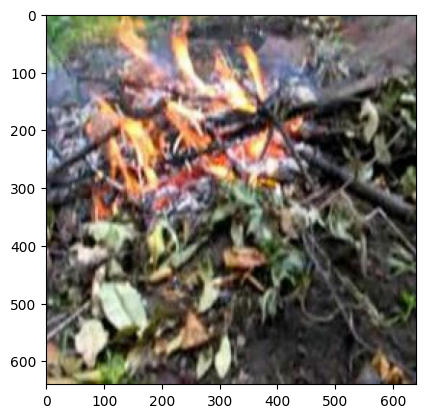

In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(images[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)

plt.imshow(img)

### Modify Configuration


In [10]:
!pip install omegaconf
clear_output()

In [11]:
from omegaconf import OmegaConf

DATA_CONFIG = f'{HOME}/datasets/smokeandfire-2/data.yaml'
config = OmegaConf.load(DATA_CONFIG)
print(OmegaConf.to_yaml(config))

path: ../datasets/roboflow
train: train/images
val: valid/images
test: test/images
names:
  0: Fire
  1: Smoke



### Set Train and Val pathes


In [12]:
config.train = f'{HOME}/datasets/smokeandfire-2/train/images'
config.test = f'{HOME}/datasets/smokeandfire-2/test/images'
config.val = f'{HOME}/datasets/smokeandfire-2/valid/images'

if 'path' in config:
    del config['path']

print(OmegaConf.to_yaml(config))

train: /kaggle/working/datasets/smokeandfire-2/train/images
val: /kaggle/working/datasets/smokeandfire-2/valid/images
test: /kaggle/working/datasets/smokeandfire-2/test/images
names:
  0: Fire
  1: Smoke



In [13]:
OmegaConf.save(config, DATA_CONFIG)

### CLI Basics


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).


### Custom Training


In [14]:
dataset.location

'/kaggle/working/datasets/smokeandfire-2'

In [15]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True batch=32 optimizer='AdamW'

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 171MB/s]
Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/smokeandfire-2/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

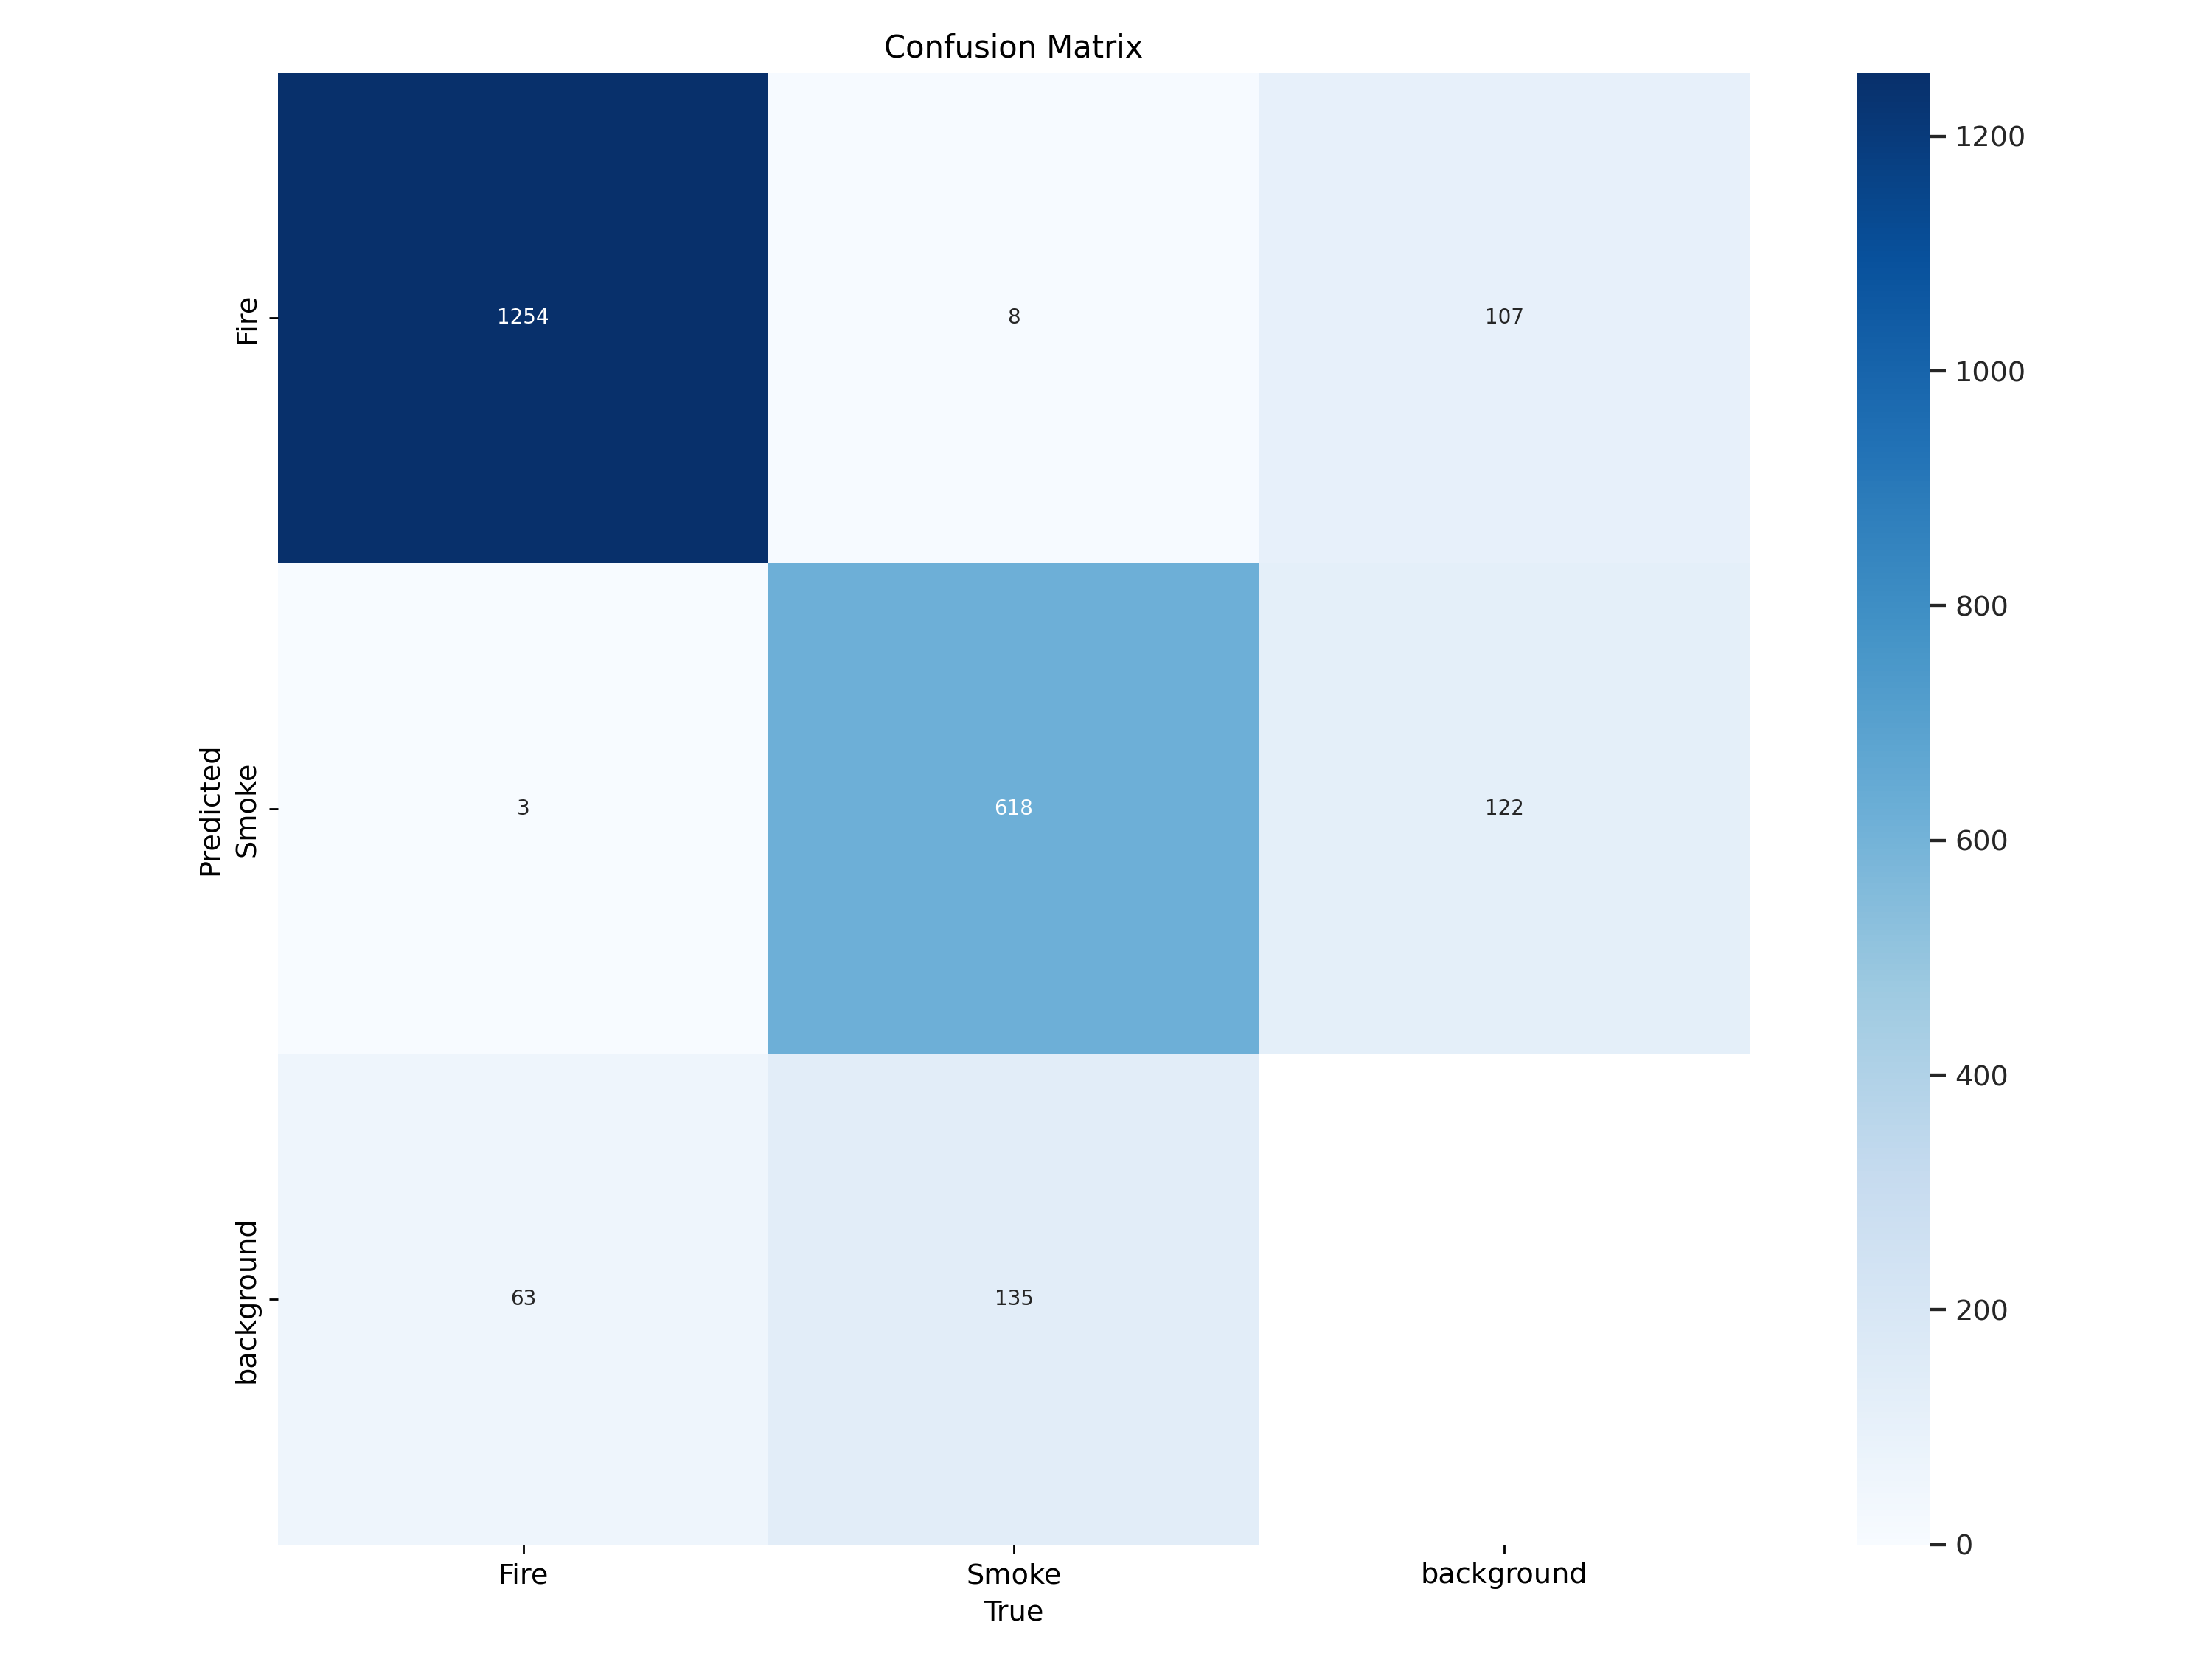

In [16]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

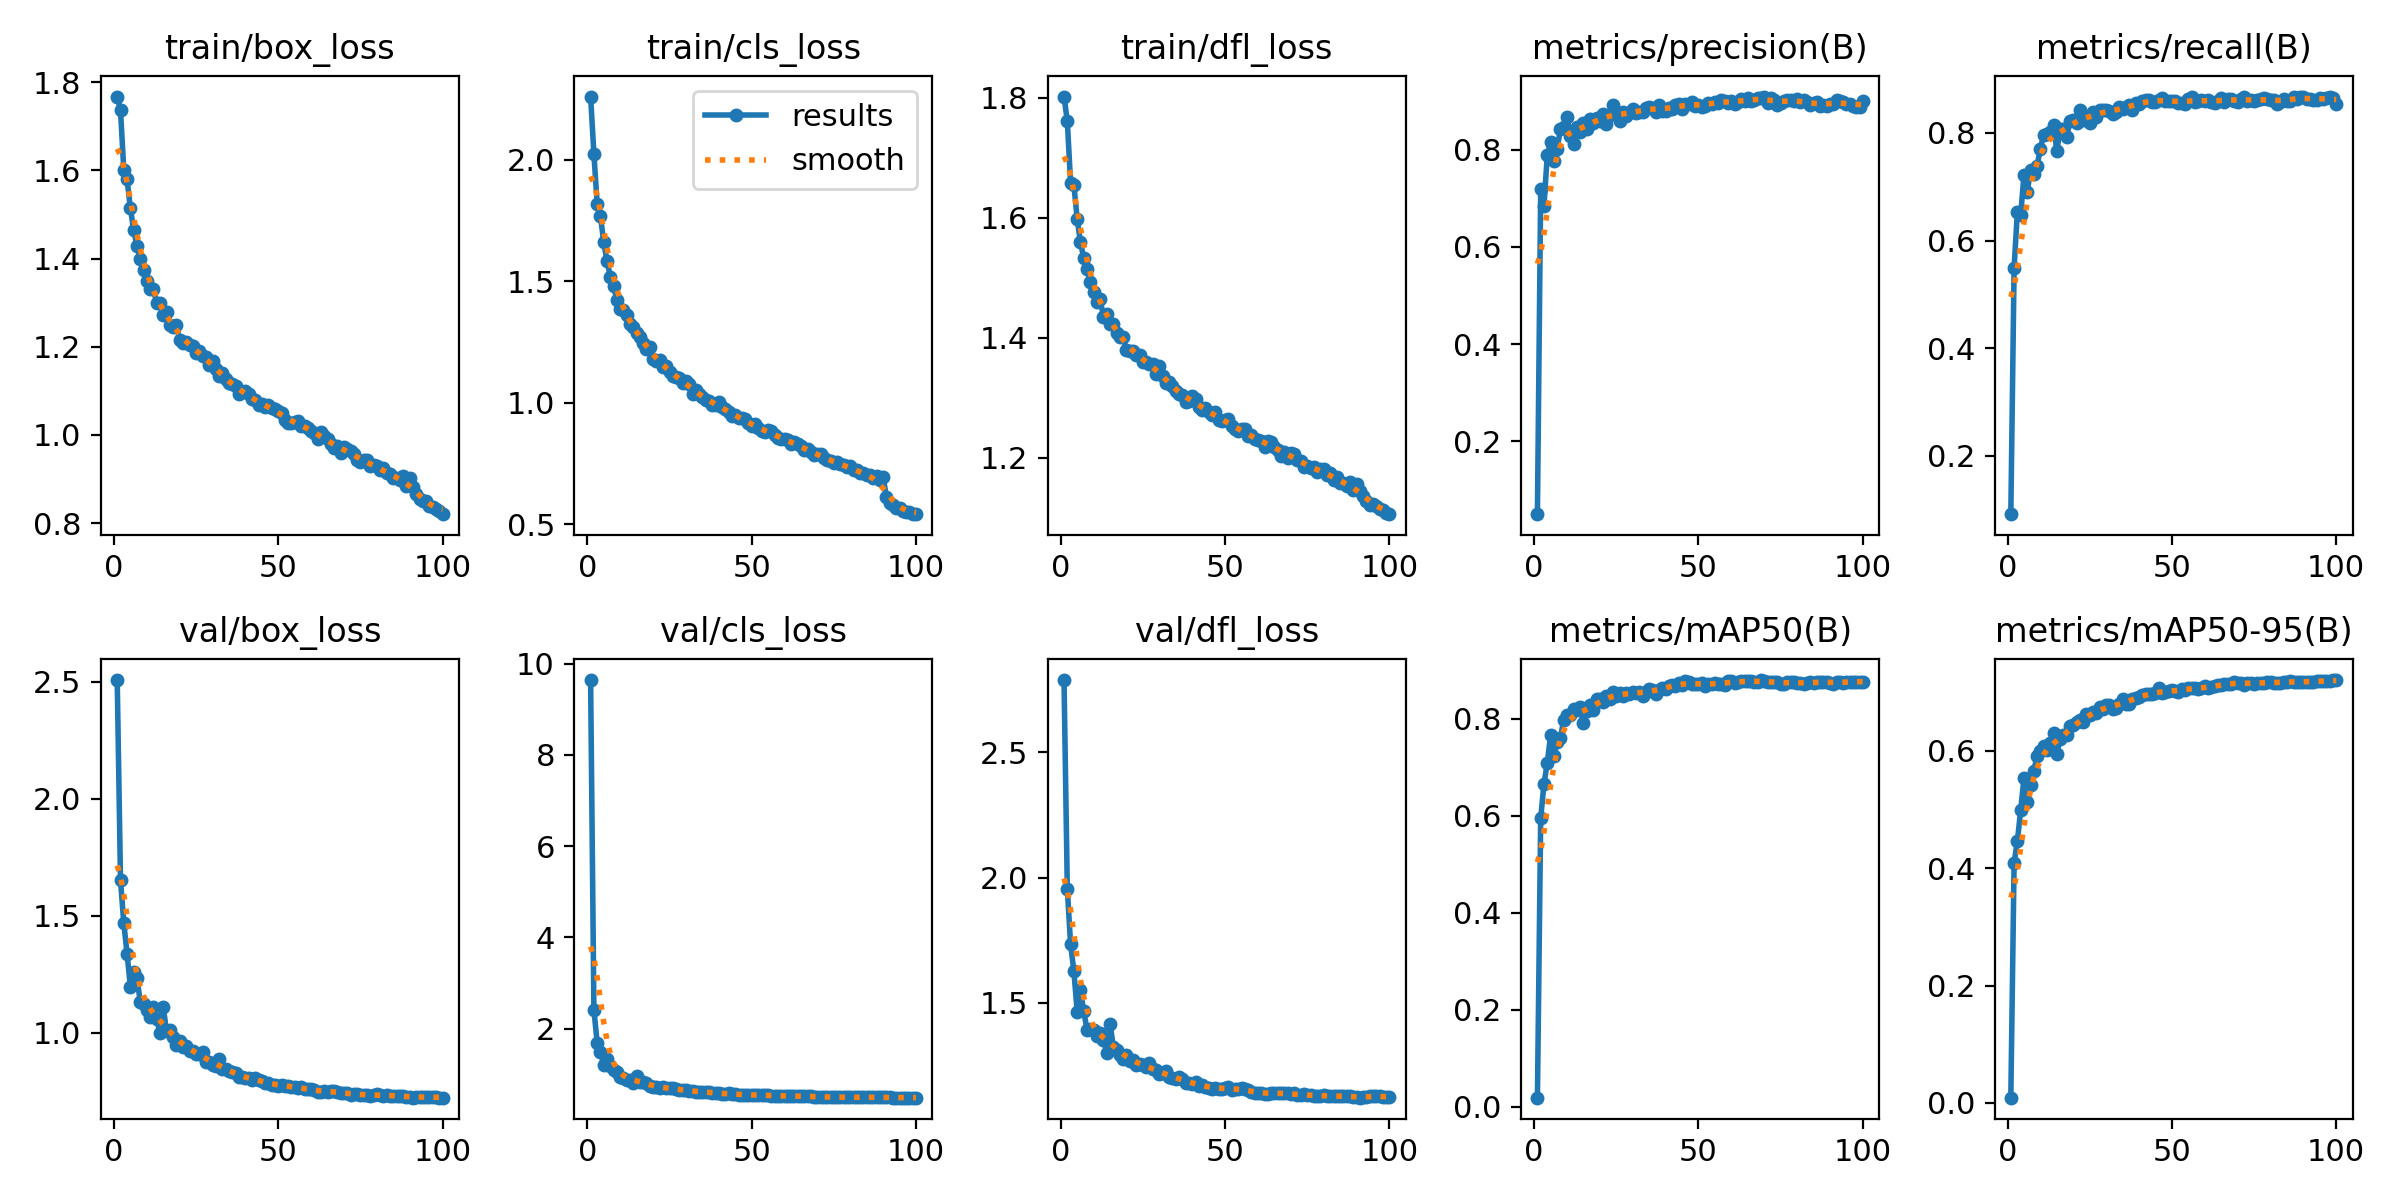

In [17]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

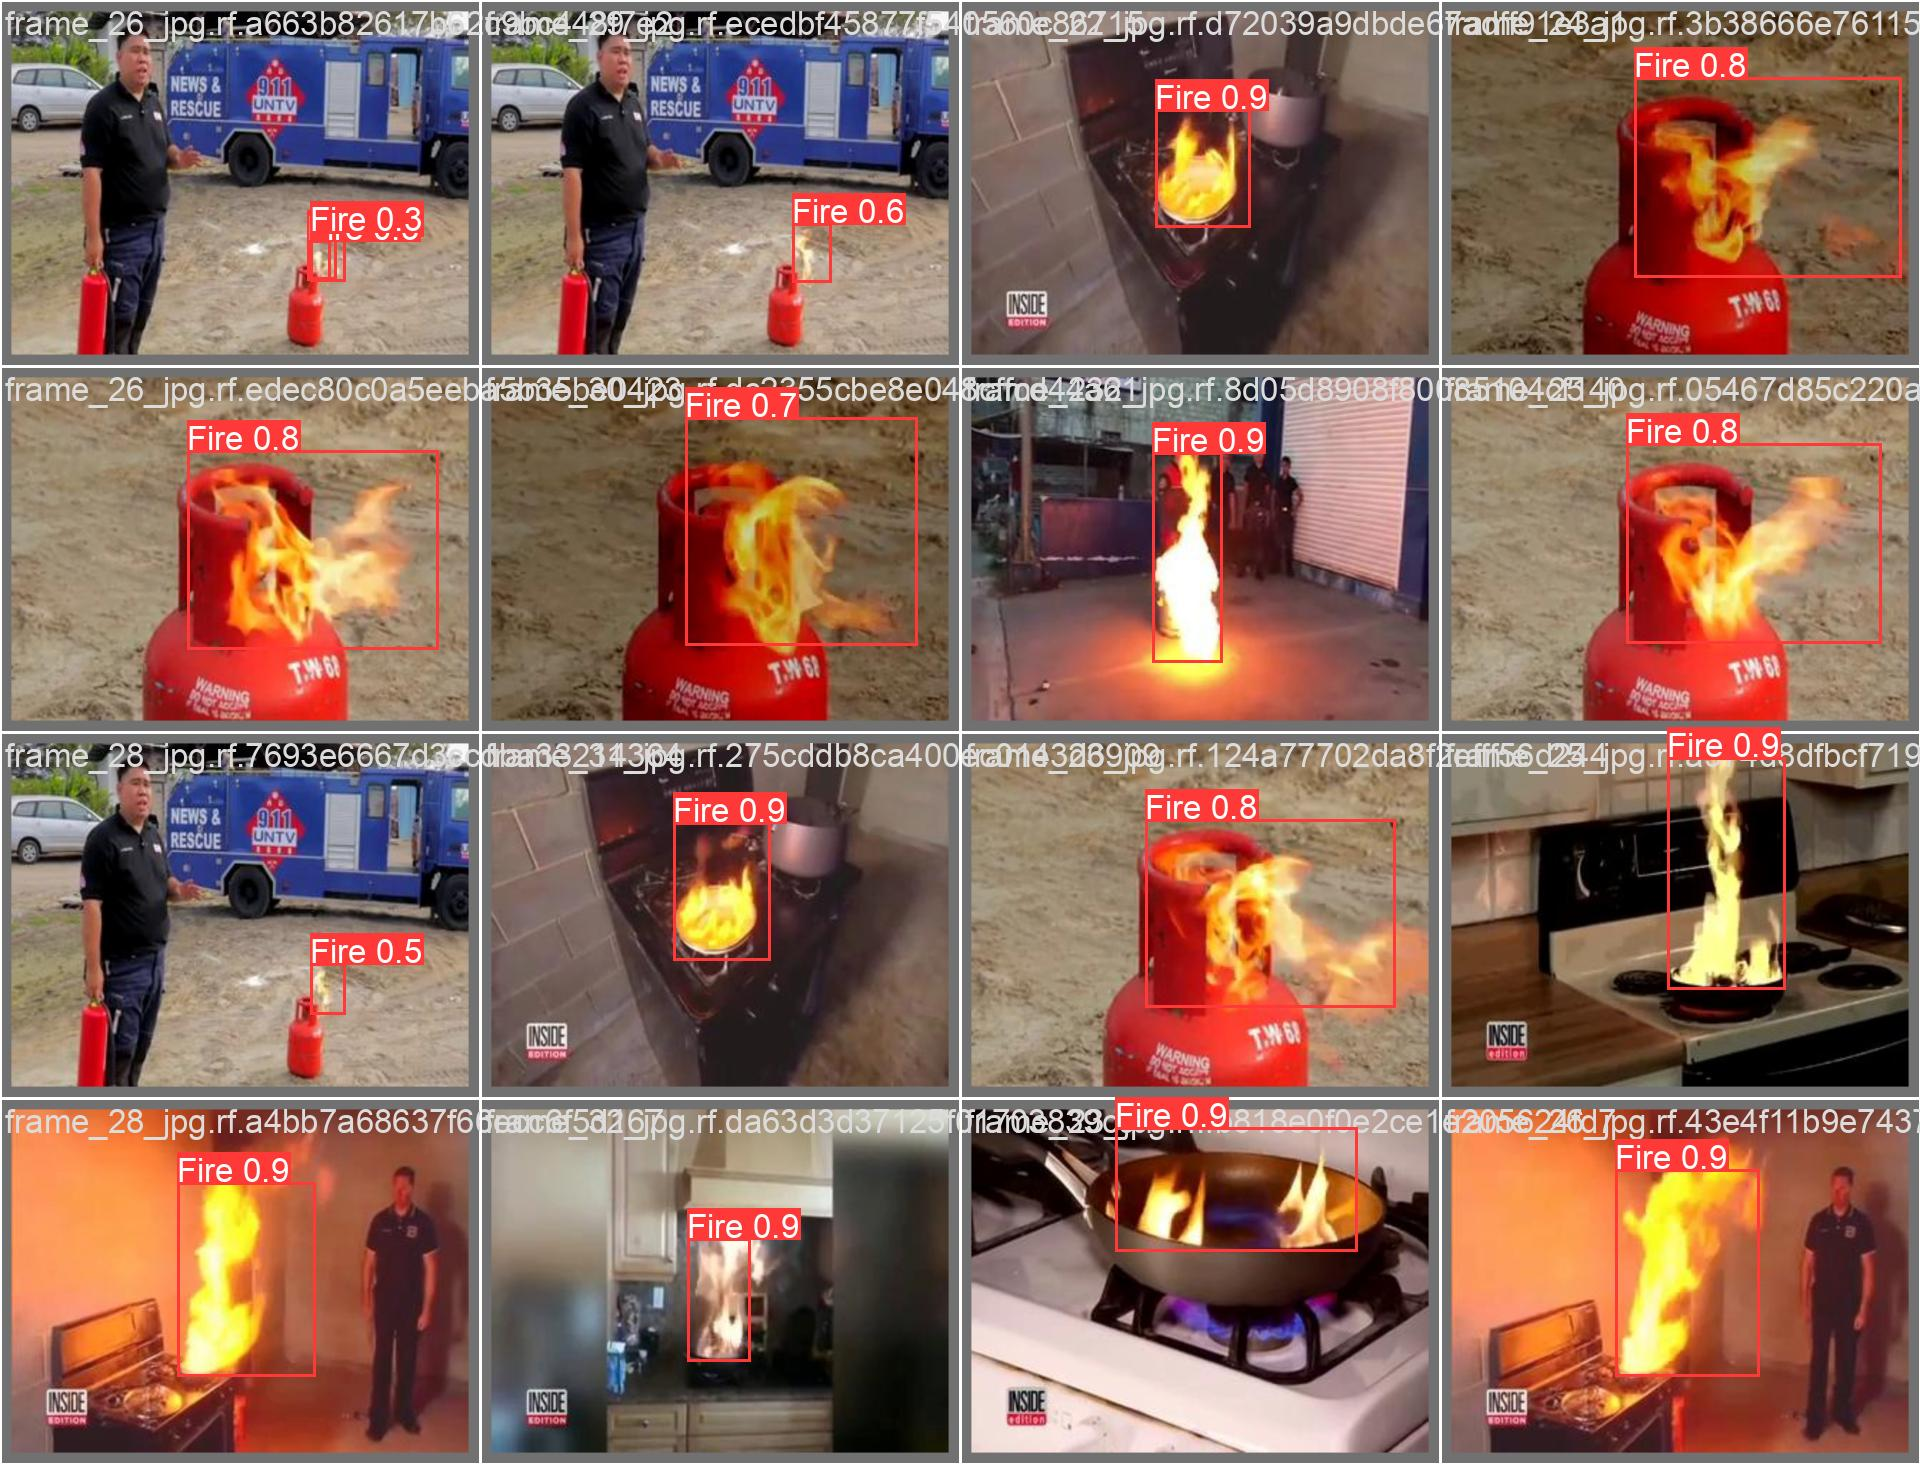

In [18]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Validate Custom Model


In [19]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/smokeandfire-2/valid/labels.cache... 1062
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1062       2081      0.901      0.854      0.877      0.721
                  Fire       1062       1320      0.922      0.936      0.937      0.783
                 Smoke       1062        761      0.881      0.771      0.817      0.658
Speed: 0.4ms preprocess, 7.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inference with Custom Model


In [20]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/543 /kaggle/working/datasets/smokeandfire-2/test/images/0055_jpg.rf.09d79673d86d0fa52a1a93305ed458a4.jpg: 640x640 1 Fire, 2 Smokes, 16.5ms
image 2/543 /kaggle/working/datasets/smokeandfire-2/test/images/WEB09331_jpg.rf.2d941bdffa4e11ff7b2cec8066d4c7b8.jpg: 384x640 (no detections), 78.4ms
image 3/543 /kaggle/working/datasets/smokeandfire-2/test/images/fire_damage_jpg.rf.838bde4b3b1d858518122e70d47e5571.jpg: 640x640 7 Fires, 17.1ms
image 4/543 /kaggle/working/datasets/smokeandfire-2/test/images/fire_jpg.rf.232cadba585833a210940943e54c02f5.jpg: 640x640 1 Fire, 16.3ms
image 5/543 /kaggle/working/datasets/smokeandfire-2/test/images/frame_005_jpg.rf.4b798b1474d24f9a332af2f1f4b8e97b.jpg: 480x640 1 Fire, 78.7ms
image 6/543 /kaggle/working/datasets/smokeandfire-2/test/images/frame_005_jpg.rf.5cf281ebb6c4f964c7387ace32e4502d.jp

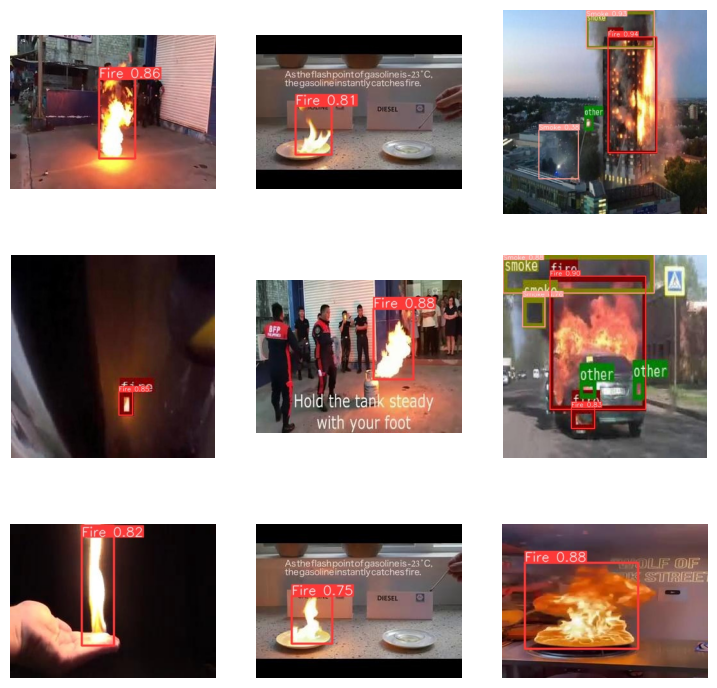

In [21]:
plt.figure(figsize=(9, 9))
image_path = glob(f'/kaggle/working/runs/detect/predict/*.jpg')[:9]
for i in range(9):
  img = cv2.imread(image_path[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img)
  plt.axis("off")

In [22]:
!zip -r fire_detection_model.zip '/kaggle/working/runs/detect'

  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/val/ (stored 0%)
  adding: kaggle/working/runs/detect/val/PR_curve.png (deflated 15%)
  adding: kaggle/working/runs/detect/val/R_curve.png (deflated 13%)
  adding: kaggle/working/runs/detect/val/val_batch0_labels.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/val/val_batch2_pred.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/val/confusion_matrix.png (deflated 34%)
  adding: kaggle/working/runs/detect/val/confusion_matrix_normalized.png (deflated 35%)
  adding: kaggle/working/runs/detect/val/val_batch1_pred.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/val/F1_curve.png (deflated 12%)
  adding: kaggle/working/runs/detect/val/P_curve.png (deflated 13%)
  adding: kaggle/working/runs/detect/val/val_batch0_pred.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/val/val_batch1_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/val/val_batch2_labels.jpg (deflated 8%)
 